In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Olympics 2024.csv")
df.sample(10)

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
67,Basketball,5,Spain,0,1,0,1
190,Golf,5,China,0,0,1,1
265,Rowing,16,Switzerland,0,0,1,1
316,Sport climbing,2,Great Britain,1,0,0,1
336,Swimming,10,Germany,1,1,1,3
342,Swimming,16,Japan,0,1,0,1
311,Skateboarding,2,Australia,2,0,0,2
446,Wrestling,19,North Korea,0,0,2,2
105,Breaking,3,France*,0,1,0,1
132,Cycling,5,Great Britain,2,5,4,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Competitions  454 non-null    object
 1   Rank          454 non-null    object
 2   NOC           454 non-null    object
 3   Gold          454 non-null    int64 
 4   Silver        454 non-null    int64 
 5   Bronze        454 non-null    int64 
 6   Total         454 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 25.0+ KB


In [4]:
df.isna().sum()

Competitions    0
Rank            0
NOC             0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [5]:
df.describe()

,Gold,Silver,Bronze,Total
count,454.000000,454.000000,454.000000,454.000000
mean,0.724670,0.726872,0.848018,2.299559
std,1.329396,1.228912,1.110370,2.900582
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,14.000000,13.000000,9.000000,34.000000


In [6]:
df.rename(columns={"NOC":"Country"}, inplace=True)

In [7]:
df['Competitions'].nunique()

35

In [8]:
df['Country'].nunique()

93

In [9]:
df[df['Total'] == 0]

,Competitions,Rank,Country,Gold,Silver,Bronze,Total


#every country has won the Medal in Olympics

In [10]:
single_medal = df[df['Total'] == 1]
single_medal

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1
5,Archery,6,Mexico,0,0,1,1
6,Archery,7,Turkey,0,0,1,1
8,Artistic swimming,2,Great Britain,0,1,0,1
...,...,...,...,...,...,...,...
449,Wrestling,22,Denmark,0,0,1,1
450,Wrestling,23,Greece,0,0,1,1
451,Wrestling,24,India,0,0,1,1
452,Wrestling,25,Norway,0,0,1,1


In [11]:
len(single_medal)

257

In [12]:
single_medal['Country'].nunique()

78

In [13]:
# There are 78 country who has won only 1 medal in Entire game in Olympics

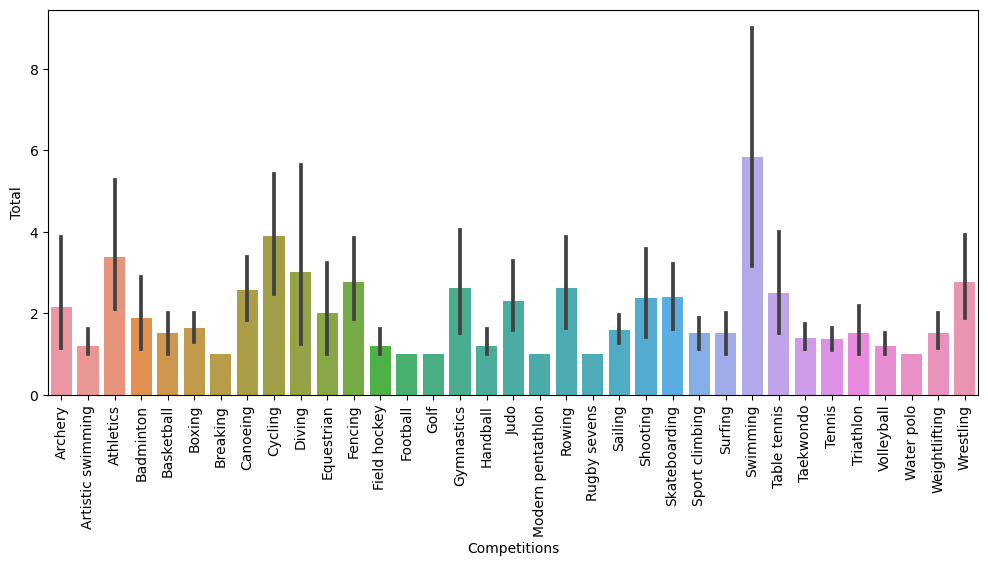

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Competitions", y="Total")
plt.xticks(rotation=90)
plt.show()

#### Here we can see the Most of the Medals are commning From the Swimming side of the Competition followed bu the, Cyccling so we can assume that these are the 2 Games where Players are more generative than other games

In [15]:
swimming = df[df['Competitions'] == "Swimming"]
swimming

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
327,Swimming,1,United States,8,13,7,28
328,Swimming,2,Australia,7,9,3,19
329,Swimming,3,France*,4,1,2,7
330,Swimming,4,Canada,3,2,3,8
331,Swimming,5,Hungary,3,1,1,5
332,Swimming,6,China,2,3,7,12
333,Swimming,7,Italy,2,1,3,6
334,Swimming,8,Sweden,2,0,0,2
335,Swimming,9,Great Britain,1,4,0,5
336,Swimming,10,Germany,1,1,1,3


In [16]:
swimming['Total'].max()

28

In [17]:
swimming[swimming['Total'] == 28]

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
327,Swimming,1,United States,8,13,7,28


TheSwimming is the competition where the maximum number of medals is been Acheived from the US

In [18]:
country = df.groupby("Country")['Total'].sum().reset_index()
country = country.sort_values(by="Total", ascending=False)
country

,Country,Total
90,United States,126
15,China,91
32,Great Britain,65
29,France*,64
4,Australia,53
...,...,...
28,Fiji,1
23,Dominica,1
20,Cyprus,1
13,Cape Verde,1


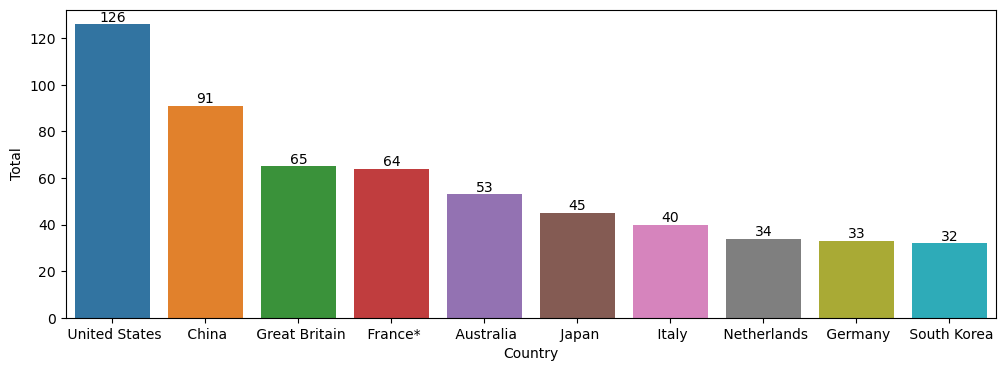

In [19]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=country[:10], x="Country", y="Total")
ax.bar_label(ax.containers[0])
plt.show()

These the top 10 countries which have the Most medals for their Country

### top 10 gold Medalist Country

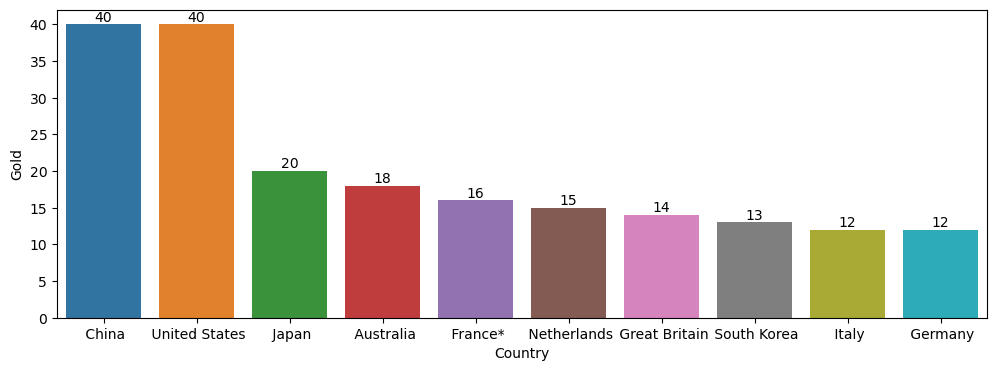

In [20]:
Gold = df.groupby("Country")['Gold'].sum().reset_index()
Gold = Gold.sort_values(by="Gold", ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=Gold[:10], x="Country", y="Gold")
ax.bar_label(ax.containers[0])
plt.show()

# top 10 Silver Medalist Country

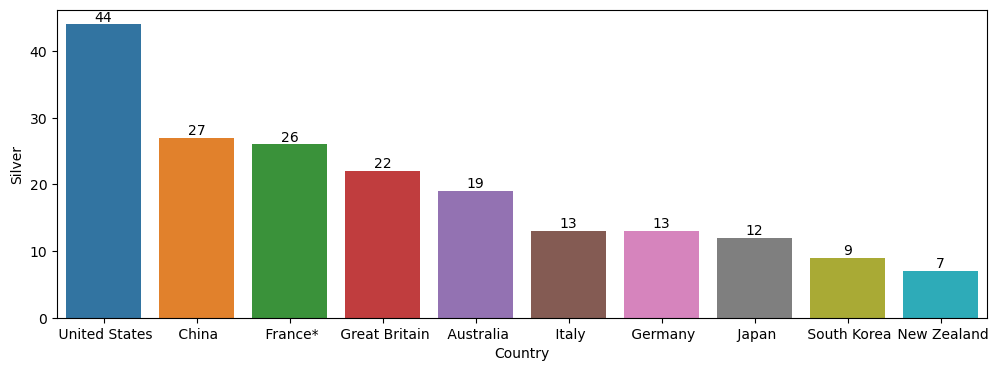

In [21]:
Silver = df.groupby("Country")['Silver'].sum().reset_index()
Silver = Silver.sort_values(by="Silver", ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=Silver[:10], x="Country", y="Silver")
ax.bar_label(ax.containers[0])
plt.show()

# top 10 Bronze Medalist Country

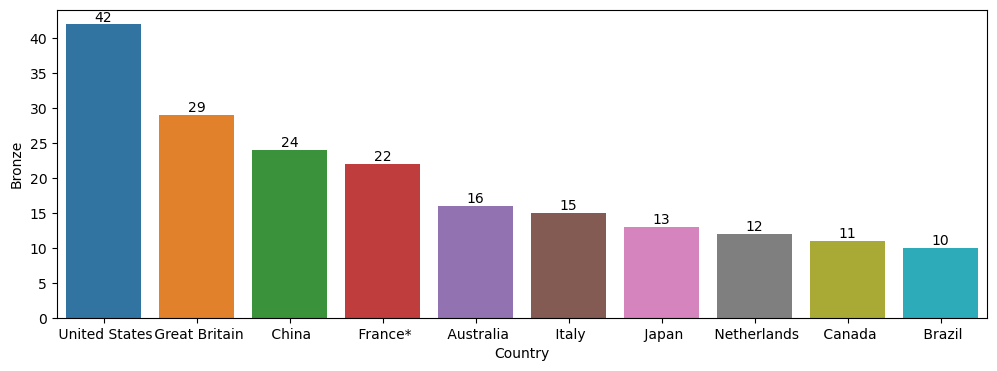

In [22]:
Bronze = df.groupby("Country")['Bronze'].sum().reset_index()
Bronze = Bronze.sort_values(by="Bronze", ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=Bronze[:10], x="Country", y="Bronze")
ax.bar_label(ax.containers[0])
plt.show()

# Top Competitions in Gold Category

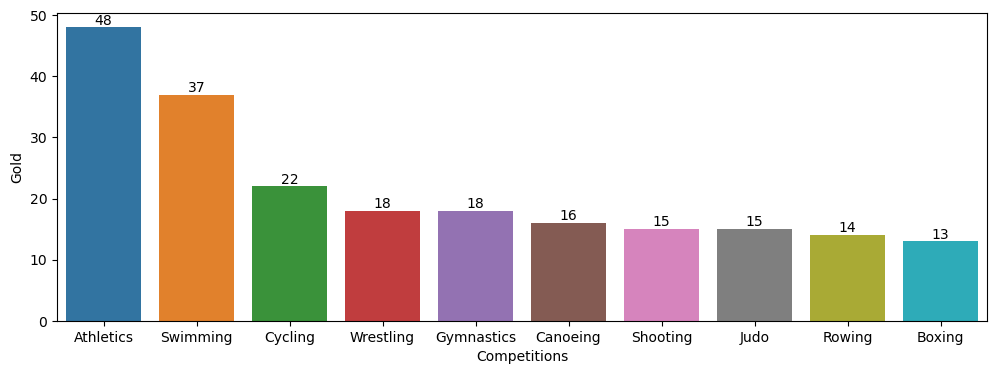

In [23]:
Gold = df.groupby("Competitions")['Gold'].sum().reset_index()
Gold = Gold.sort_values(by="Gold", ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=Gold[:10], x="Competitions", y="Gold")
ax.bar_label(ax.containers[0])
plt.show()

# Top Competitions in Silver Category

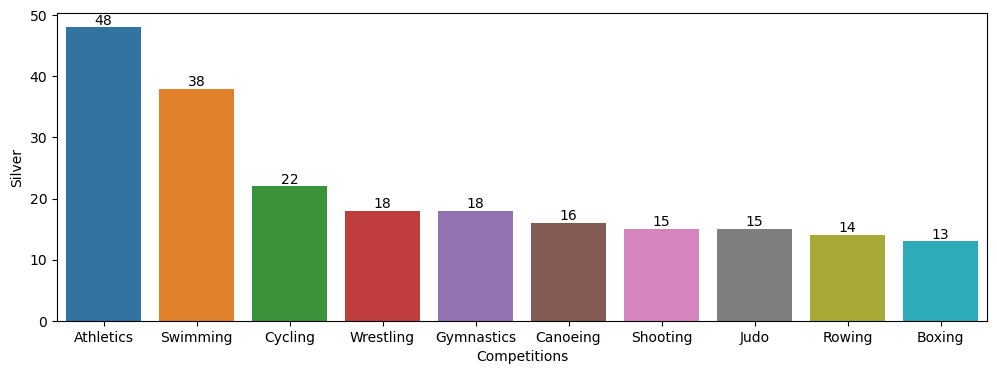

In [24]:
Silver = df.groupby("Competitions")['Silver'].sum().reset_index()
Silver = Silver.sort_values(by="Silver", ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=Silver[:10], x="Competitions", y="Silver")
ax.bar_label(ax.containers[0])
plt.show()

# Top Competitions in Silver Category

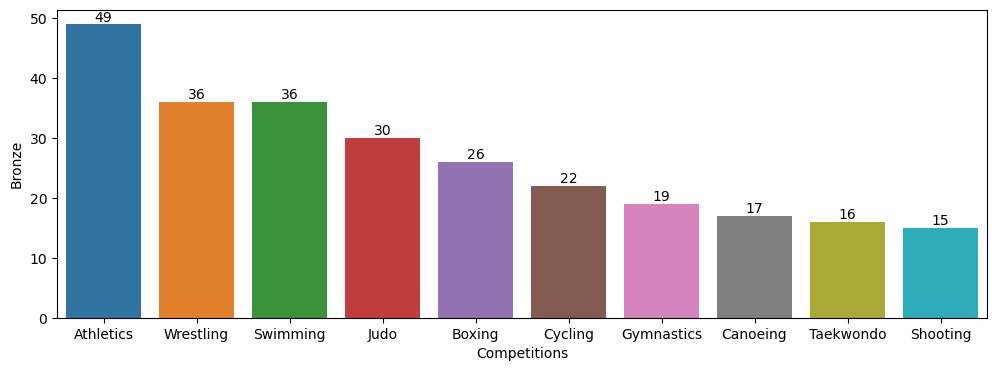

In [25]:
Bronze = df.groupby("Competitions")['Bronze'].sum().reset_index()
Bronze = Bronze.sort_values(by="Bronze", ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=Bronze[:10], x="Competitions", y="Bronze")
ax.bar_label(ax.containers[0])
plt.show()

### Rankwise Competition Country

In [26]:
df[df['Competitions'] == "Archery"]

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1
5,Archery,6,Mexico,0,0,1,1
6,Archery,7,Turkey,0,0,1,1


### Rankwise Competition Country

In [27]:
df[df['Competitions'] == "Wrestling"]

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
428,Wrestling,1,Japan,8,1,2,11
429,Wrestling,2,Iran,2,4,2,8
430,Wrestling,3,United States,2,2,3,7
431,Wrestling,4,Bulgaria,2,0,0,2
432,Wrestling,5,Cuba,1,1,3,5
433,Wrestling,6,Georgia,1,1,0,2
434,Wrestling,7,Uzbekistan,1,0,1,2
435,Wrestling,8,Bahrain,1,0,0,1
436,Wrestling,9,Ukraine,0,2,1,3
437,Wrestling,10,China,0,1,4,5


In [28]:
df[df['Competitions'] == "Tennis"]

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
375,Tennis,1,China,1,1,0,2
376,Tennis,2,Italy,1,0,1,2
377,Tennis,3,Australia,1,0,0,1
378,Tennis,4,Czech Republic,1,0,0,1
379,Tennis,5,Serbia,1,0,0,1
380,Tennis,6,Spain,0,1,1,2
381,Tennis,7,United States,0,1,1,2
382,Tennis,8,Croatia,0,1,0,1
383,Tennis,9,Individual Neutral Athletes,0,1,0,1
384,Tennis,10,Canada,0,0,1,1


In [29]:
df[df['Competitions'] == "Judo"]

,Competitions,Rank,Country,Gold,Silver,Bronze,Total
218,Judo,1,Japan,3,2,3,8
219,Judo,2,France*,2,2,6,10
220,Judo,3,Azerbaijan,2,0,0,2
221,Judo,4,Georgia,1,2,0,3
222,Judo,5,Brazil,1,1,2,4
223,Judo,6,Uzbekistan,1,0,2,3
224,Judo,7,Kazakhstan,1,0,1,2
225,Judo,8,Canada,1,0,0,1
226,Judo,9,Croatia,1,0,0,1
227,Judo,10,Italy,1,0,0,1
